In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd

In [2]:
# read names that have provided survey eye color data
columns = ['name', 'left', 'right', 'left_desc', 'right_desc']
# pgp eye color data from survey
surveyData = pd.read_csv("PGP-eyecolor.csv", names=columns, na_values=['nan', ''])
# names of the pgp participants
surveyNames = np.asarray(surveyData['name'].values.tolist())
leftEyeColors = surveyData['left']
rightEyeColors = surveyData['right']

In [3]:
# load numpy array of names
pgpNames = np.load("names.npy")
# load numpy array of tiled data and delete the extra information
pgp = np.load("hiq-pgp.npy")
for i in range(len(pgpNames)):
    pgpNames[i] = pgpNames[i][:8]

In [4]:
def getData(name, surveyData):
    for index, row in surveyData.iterrows():
        if row['name'] == name:
            return (row['left'], row['right'])

In [5]:
# populate name dictionaries with respective eye color data
namePairIndices = []
nameLeftEyeMap = {}
nameRightEyeMap = {}
for i in range(len(pgpNames)):
    if pgpNames[i] in surveyNames:
        eyeData = getData(pgpNames[i], surveyData)
        namePairIndices.append((i, pgpNames[i]))
        nameLeftEyeMap[pgpNames[i]] = eyeData[0]
        nameRightEyeMap[pgpNames[i]] = eyeData[1]

# create lists containing the known eye color names and the unknown ones.
nameIndices = [nameIndex[0] for nameIndex in namePairIndices]
knownData = pgp[nameIndices]
unknownData = np.delete(pgp, nameIndices, axis=0)

In [7]:
# convert dictionaries to lists using knownData
leftEyeNameList = []
rightEyeNameList = []

knownDataNames = [nameIndices]
for nameTuple in namePairIndices:
    leftEyeNameList.append(nameLeftEyeMap[nameTuple[1]])
    rightEyeNameList.append(nameRightEyeMap[nameTuple[1]])
    
for i in range(len(leftEyeNameList)):
    eyeColor = leftEyeNameList[i]
    if eyeColor > 17:
        leftEyeNameList[i] = 1
    else:
        leftEyeNameList[i] = 0

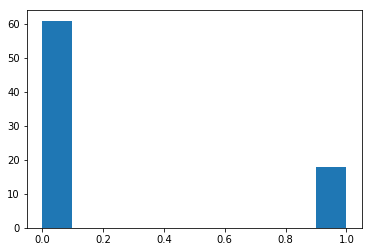

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(leftEyeNameList)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
clf = MLPClassifier()
clf.fit(knownData, leftEyeNameList)
pred = clf.predict(knownData)

In [ ]:
print accuracy_score(leftEyeNameList, pred)

In [11]:
from sklearn.model_selection import cross_val_score
neural = MLPClassifier()
cvscore = cross_val_score(neural, knownData, leftEyeNameList, cv=10)

MemoryError: 

In [30]:
nonzeroes = np.nonzero(clf.coef_)[1]
nonzeroes

1.0
[   9153  118665  131097  202427  214301  414323  426932  491881  510859
  570908  572901  573869  633489  633945  672847  672863  734315  842543
  869133  872655  872668  980587 1021427 1034651 1089423 1090083 1094105
 1097075 1207239 1214713 1214799 1246385 1278269 1415555 1440803 1518505
 1646825 1654239 1706439 1709485 1866551 1867015 1899325 1926889 1933450
 1949505 2097203 2190065 2200081 2252013 2459513]


In [40]:
clf.coef_[0][nonzeroes]

array([-0.02977927, -0.07226471,  0.01570802, -0.00044893,  0.03791838,
        0.00280398, -0.02655785, -0.02755824, -0.01257585,  0.02215586,
        0.01384371, -0.01599796,  0.03580997,  0.01196329,  0.01715992,
        0.00870628, -0.01236526,  0.00261284,  0.02164314, -0.01349138,
        0.01644594, -0.02386748, -0.0146622 ,  0.01118985,  0.02480712,
        0.00690436, -0.00936586,  0.01256897,  0.04309965,  0.03993802,
       -0.01545511, -0.03778697,  0.02845486,  0.01694705, -0.00643572,
       -0.01222434,  0.00114175, -0.00746093, -0.00367822,  0.02841879,
        0.00134367,  0.00250543, -0.00269715, -0.00430972, -0.02063049,
       -0.00779533, -0.00133898, -0.00884822, -0.0002676 ,  0.05328209,
       -0.01789651])

In [59]:
print clf.coef_[0][nonzeroes].max()
print nonzeroes[clf.coef_[0][nonzeroes].argmax()]

0.0532820919124
2252013


In [48]:
from sklearn.externals import joblib
joblib.dump(clf, 'eye_classifier.pkl') 

['eye_classifier.pkl']